# 比较两个图片是否相同

## 一、使用python+PIL

In [3]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt # plt 用于显示图片
%matplotlib inline

In [4]:
def compare_images(path_one, path_two, diff_save_location):
    """
    比较图片，如果有不同则生成展示不同的图片

    @参数一: path_one: 第一张图片的路径
    @参数二: path_two: 第二张图片的路径
    @参数三: diff_save_location: 不同图的保存路径
    """
    image_one = Image.open(path_one)
    image_two = Image.open(path_two)

    diff = ImageChops.difference(image_one, image_two)

    if diff.getbbox() is None:
        # 图片间没有任何不同则直接退出
        return
    else:
        diff.save(diff_save_location)

In [5]:
compare_images('image/1.jpg','image/2.jpg','image/diff1_2.jpg')

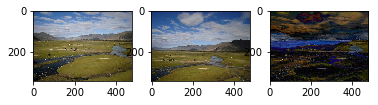

In [6]:
img1 = Image.open('image/1.jpg')
img2 = Image.open('image/2.jpg')
diff = Image.open('image/diff1_2.jpg')
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(diff)

In [7]:
compare_images('image/3.jpg','image/4.jpg','image/diff3_4.jpg')

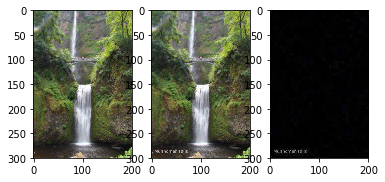

In [8]:
img1 = Image.open('image/3.jpg')
img2 = Image.open('image/4.jpg')
diff = Image.open('image/diff3_4.jpg')
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(diff)

In [9]:
compare_images('image/111.jpg','image/222.jpg','image/diff111_222.jpg')

反色处理后将两个图像混合直接看到两个的差异部分。

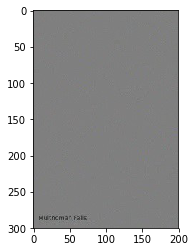

In [10]:
diff_blend = Image.blend(img1, ImageChops.invert(img2), 0.5)
plt.imshow(diff_blend)

In [11]:
img111 = Image.open('image/111.jpg')
img222 = Image.open('image/222.jpg')

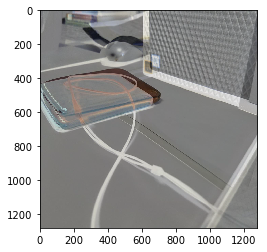

In [12]:
diff_blend = Image.blend(img111, ImageChops.invert(img222), 0.5)
plt.imshow(diff_blend)

In [14]:
compare_images('image/333.jpg','image/444.jpg','image/diff333_444.jpg')

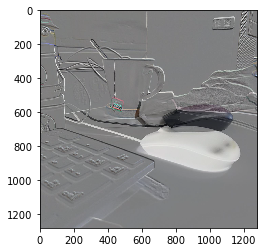

In [15]:
img333 = Image.open('image/333.jpg')
img444 = Image.open('image/444.jpg')
diff_blend = Image.blend(img333, ImageChops.invert(img444), 0.5)
plt.imshow(diff_blend)

In [16]:
diff_blend.save('image/diff_blend.jpg')

## 二、使用python+opencv
**安装opencv**：
1. 进入网站 http://www.lfd.uci.edu/~gohlke/pythonlibs/ ，下载与当前环境兼容的 opencv 文件
2. 切换到该文件所在目录，命令行环境下pip install opencv_python-3.2.0-cp36-cp36m-win_amd64.whl

**opencv资料**：
1. http://lib.csdn.net/base/opencv

In [17]:
import cv2
import numpy as np

In [18]:
img1 = cv2.imread('image/1.jpg')
img2 = cv2.imread('image/2.jpg')

In [22]:
img333 = cv2.imread('image/333.jpg')
img444 = cv2.imread('image/444.jpg')

### 直方图计算法

1. 方法：计算其直方图的重合程度。
2. 缺点：按照颜色的全局分布来看，无法描述颜色的局部分布和色彩所处的位置。
3. 对策：缓解这个弱点有一个方法就是利用Image的crop方法把图片等分，然后再分别计算其相似度，最后综合考虑。

In [23]:
# 最简单的以灰度直方图作为相似比较的实现 
def classify_gray_hist(image1,image2,size = (256,256)): 
    # 先计算直方图 
    # 几个参数必须用方括号括起来 
    # 这里直接用灰度图计算直方图，所以是使用第一个通道， 
    # 也可以进行通道分离后，得到多个通道的直方图 
    # bins 取为16 
    image1 = cv2.resize(image1,size) 
    image2 = cv2.resize(image2,size) 
    hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
    hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
    # 可以比较下直方图 
    plt.plot(range(256),hist1,'r') 
    plt.plot(range(256),hist2,'b') 
    plt.show() 
    # 计算直方图的重合度 
    degree = 0
    for i in range(len(hist1)): 
        if hist1[i] != hist2[i]: 
            degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
        else: 
            degree = degree + 1
    degree = degree/len(hist1) 
    return degree 

In [24]:
gray333 = cv2.cvtColor(img333,cv2.COLOR_BGR2GRAY) 
gray444 = cv2.cvtColor(img444,cv2.COLOR_BGR2GRAY)

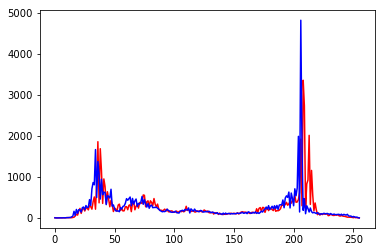

array([ 0.71336746], dtype=float32)

In [25]:
classify_gray_hist(img333, img444)

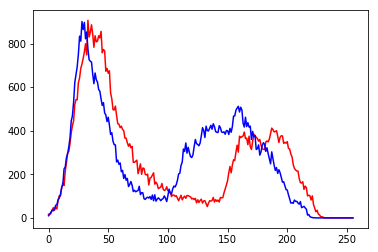

array([ 0.59439552], dtype=float32)

In [26]:
classify_gray_hist(img1, img2)

In [27]:
def calculate(image1, image2):
    hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
    hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
    degree = 0
    for i in range(len(hist1)): 
        if hist1[i] != hist2[i]: 
            degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
        else: 
            degree = degree + 1
    degree = degree/len(hist1) 
    return degree 

In [28]:
# 通过得到每个通道的直方图来计算相似度 
def classify_hist_with_split(image1,image2,size = (256,256)): 
    # 将图像resize后，分离为三个通道，再计算每个通道的相似值 
    image1 = cv2.resize(image1,size) 
    image2 = cv2.resize(image2,size) 
    sub_image1 = cv2.split(image1) 
    sub_image2 = cv2.split(image2) 
    sub_data = 0
    for im1,im2 in zip(sub_image1,sub_image2): 
        sub_data += calculate(im1,im2) 
    sub_data = sub_data/3
    return sub_data 

In [14]:
classify_hist_with_split(img1, img2)

array([ 0.61790586], dtype=float32)

In [29]:
classify_hist_with_split(img333, img444)

array([ 0.74269933], dtype=float32)

### 图像指纹与汉明距离

In [30]:
# 输入灰度图，返回hash 
def getHash(image): 
    avreage = np.mean(image) 
    hash = [] 
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            if image[i,j] > avreage: 
                hash.append(1) 
            else: 
                hash.append(0) 
    return hash

**汉明距离**:  
就是一组二进制数据变成另一组数据所需的步骤数，显然，这个数值可以衡量两张图片的差异，汉明距离越小，则代表相似度越高。汉明距离为0，即代表两张图片完全一样。

In [31]:
# 计算汉明距离 
def Hamming_distance(hash1,hash2): 
    num = 0
    for index in range(len(hash1)): 
        if hash1[index] != hash2[index]: 
            num += 1
    return num 

### 平均哈希法(aHash)
1. 缩放图片，一般大小为8*8，64个像素值。
2. 转化为灰度图
3. 计算平均值：计算进行灰度处理后图片的所有像素点的平均值，直接用numpy中的mean()计算即可。
4. 比较像素灰度值：遍历灰度图片每一个像素，如果大于平均值记录为1，否则为0.
5. 得到信息指纹：组合64个bit位，顺序随意保持一致性。
6. 最后比对两张图片的指纹，获得汉明距离即可。

缺点：平均哈希算法过于严格，不够精确，更适合搜索缩略图。

In [32]:
# 平均哈希算法计算 
def classify_aHash(image1,image2): 
    image1 = cv2.resize(image1,(8,8)) 
    image2 = cv2.resize(image2,(8,8)) 
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
    hash1 = getHash(gray1) 
    hash2 = getHash(gray2) 
    return Hamming_distance(hash1,hash2)

In [41]:
classify_aHash(img1, img2)

17

In [42]:
classify_aHash(img333, img444)

9

### 感知哈希算法(pHash)
目的：为了获得更精确的结果可以选择感知哈希算法，它采用的是DCT（离散余弦变换）来降低频率的方法
1. 缩小图片：32\*32是一个较好的大小，这样方便DCT计算
2. 转化为灰度图
3. 计算DCT：利用Opencv中提供的dct()方法，注意输入的图像必须是32位浮点型，所以先利用numpy中的float32进行转换
4. 缩小DCT：DCT计算后的矩阵是32\*32，保留左上角的8\*8，这些代表的图片的最低频率
5. 计算平均值：计算缩小DCT后的所有像素点的平均值。
6. 进一步减小DCT：大于平均值记录为1，反之记录为0.
7. 得到信息指纹：组合64个信息位，顺序随意保持一致性。
8. 最后比对两张图片的指纹，获得汉明距离即可。

In [35]:
def classify_pHash(image1,image2): 
    image1 = cv2.resize(image1,(32,32)) 
    image2 = cv2.resize(image2,(32,32)) 
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
    # 将灰度图转为浮点型，再进行dct变换 
    dct1 = cv2.dct(np.float32(gray1)) 
    dct2 = cv2.dct(np.float32(gray2)) 
    # 取左上角的8*8，这些代表图片的最低频率 
    # 这个操作等价于c++中利用opencv实现的掩码操作 
    # 在python中进行掩码操作，可以直接这样取出图像矩阵的某一部分 
    dct1_roi = dct1[0:8,0:8] 
    dct2_roi = dct2[0:8,0:8] 
    hash1 = getHash(dct1_roi) 
    hash2 = getHash(dct2_roi) 
    return Hamming_distance(hash1,hash2) 

In [36]:
classify_pHash(img1, img2)

20

In [43]:
classify_pHash(img333, img444)

18

### 感知哈希算法(dHash)
目的：相比pHash，dHash的速度要快的多，相比aHash，dHash在效率几乎相同的情况下的效果要更好，它是基于渐变实现的。
1. 缩小图片：收缩到9\*8的大小，以便它有72的像素点
2. 转化为灰度图
3. 计算差异值：dHash算法工作在相邻像素之间，这样每行9个像素之间产生了8个不同的差异，一共8行，则产生了64个差异值
4. 获得指纹：如果左边的像素比右边的更亮，则记录为1，否则为0.
5. 最后比对两张图片的指纹，获得汉明距离即可。

In [37]:
# 输入灰度图，返回dhash 
def getdHash(image): 
    dhash = [] 
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]-1): 
            if image[i,j] > image[i,j+1]: 
                dhash.append(1) 
            else: 
                dhash.append(0) 
    return dhash

In [38]:
def classify_dHash(image1, image2):
    image1 = cv2.resize(image1,(9,8))
    image2 = cv2.resize(image2,(9,8))
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    dhash1 = getdHash(gray1) 
    dhash2 = getdHash(gray2)
    return Hamming_distance(dhash1,dhash2) 

In [39]:
classify_dHash(img1, img2)

28

In [44]:
classify_dHash(img333, img444)

13